In [43]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

In [44]:
#Reading data 
data=pd.read_csv("./Iris.csv")
print("Describing the data: ",data.describe())
print("Info on the data:",data.info())

Describing the data:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidt

In [45]:
print("10 first samples of the dataset:",data.head(10))
print("10 last samples of the dataset:",data.tail(10))

10 first samples of the dataset:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
10 last samples of the dataset:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141          

**Visualisation of the dataset**

The coding below shows the visualisation of the dataset in order to understand the data more. It can be seen that every species of the Iris can be segregated into different regions to be predicted.

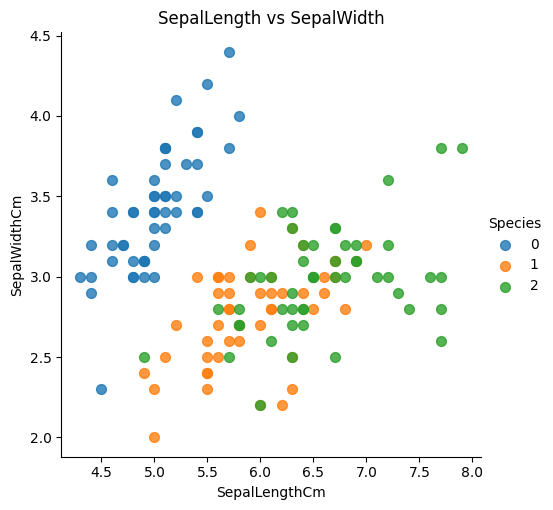

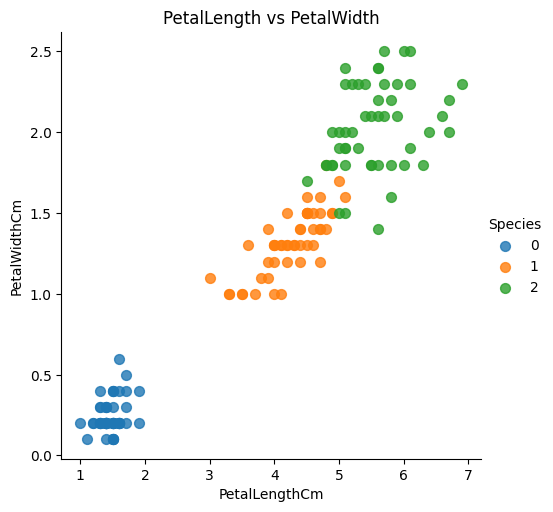

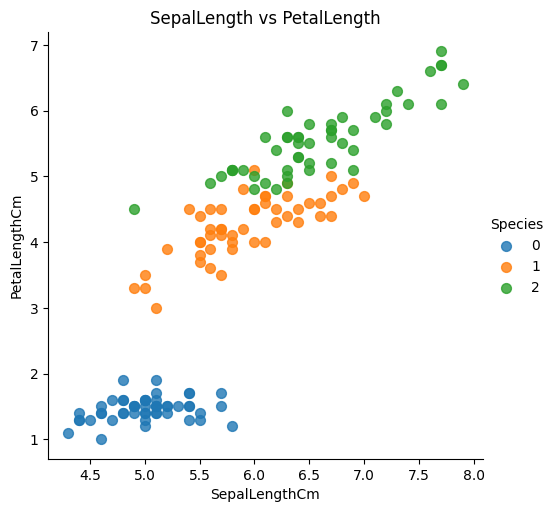

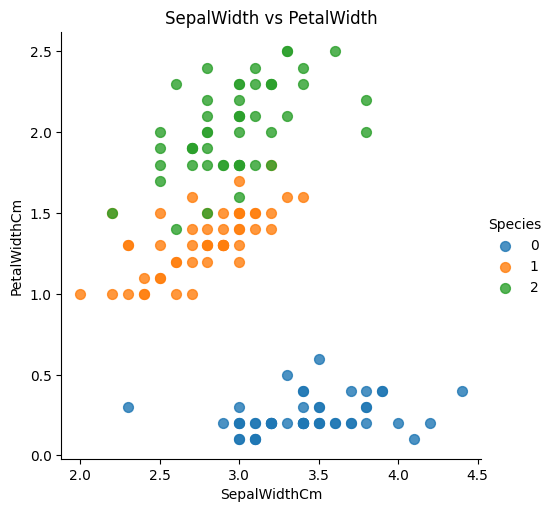

In [59]:
sns.lmplot(x = 'SepalLengthCm',y =  'SepalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot(x = 'PetalLengthCm',y =  'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot(x = 'SepalLengthCm',y = 'PetalLengthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot(x = 'SepalWidthCm',y = 'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

Coding below convert the species into each respective category to be feed into the neural network

In [30]:
print(data["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [46]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0


In [47]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
13    14            4.3           3.0            1.1           0.1       0
78    79            6.0           2.9            4.5           1.5       1
146  147            6.3           2.5            5.0           1.9       2
57    58            4.9           2.4            3.3           1.0       1
128  129            6.4           2.8            5.6           2.1       2


Converting data to numpy array in order for processing 

In [48]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[4.3 3.  1.1 0.1]
 [6.  2.9 4.5 1.5]
 [6.3 2.5 5.  1.9]]
Examples of y
 [0 1 2]


**Normalization**

It can be seen from above that the feature of the first dataset has 6cm in Sepal Length, 3.4cm in Sepal Width, 4.5cm in Petal Length and 1.6cm in Petal Width. However, the range of the dataset may be different. Therefore, in order to maintain a good accuracy, the feature of each dataset must be normalized to a range of 0-1 for processing 

In [49]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.05949399 0.07941484 0.02164365 0.0057515 ]
 [0.08301487 0.07676768 0.0885422  0.08627246]
 [0.08716562 0.06617903 0.09838022 0.10927845]]


In [50]:
#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [51]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers import BatchNormalization 
from keras.utils import to_categorical

In [52]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=to_categorical(y_train,num_classes=3)
y_test=to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [53]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 1s 56ms/step - loss: 1.0841 - accuracy: 0.5250 - val_loss: 1.0723 - val_accuracy: 0.3000
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 1.0188 - accuracy: 0.6000 - val_loss: 0.9666 - val_accuracy: 0.6667
Epoch 3/10
6/6 [==============================] - 0s 15ms/step - loss: 0.8786 - accuracy: 0.6667 - val_loss: 0.7758 - val_accuracy: 0.6667
Epoch 4/10
6/6 [==============================] - 0s 15ms/step - loss: 0.6879 - accuracy: 0.6667 - val_loss: 0.5443 - val_accuracy: 0.6667
Epoch 5/10
6/6 [==============================] - 0s 14ms/step - loss: 0.4835 - accuracy: 0.7750 - val_loss: 0.3562 - val_accuracy: 0.9333
Epoch 6/10
6/6 [==============================] - 0s 15ms/step - loss: 0.3303 - accuracy: 0.9333 - val_loss: 0.2397 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 14ms/step - loss: 0.2368 - accuracy: 0.9583 - val_loss: 0.1769 - val_accuracy: 0.9667
Epoch 8/10
6/6 [===========

In [56]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

1/1 [==============================] - 0s 93ms/step
Accuracy of the dataset 96.66666666666667


An accuracy of **100%** is achieved in this dataset.It can be asserted that for each epoch, the neural network is trying to learn from its existing feature and predict it by its weights and biases. For each epoch, the weights and biases and changed by subtracting its rate to get a better accuracy each time.


**Further improvement: **

1.Adding batch normalization 

2.Adding dropout layer to prevent overfitting 